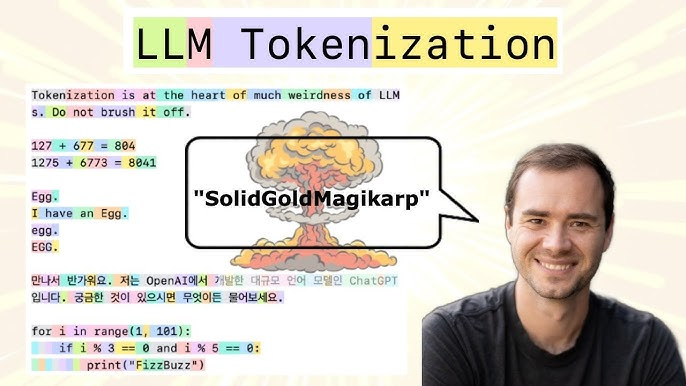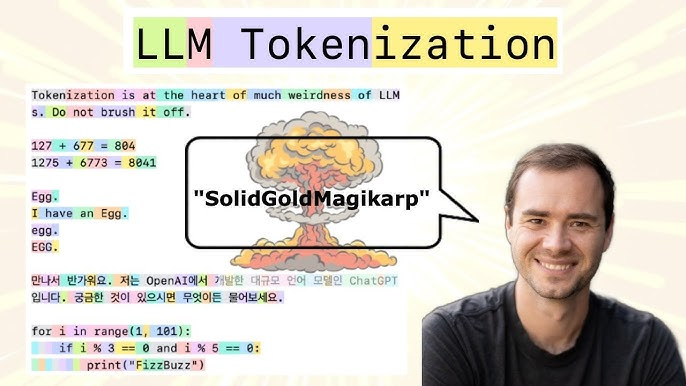

## 1.Creating tokens

In [1]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
    raw_text=f.read()
print("Total number of character:",len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [4]:
import re 
text="Hello, world. This, is a test."
result=re.split(r'(\s)',text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [5]:
esult=re.split(r'([,.]\s)',text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [6]:
result = [item for item in result if item.strip()]
print(result)

['Hello,', 'world.', 'This,', 'is', 'a', 'test.']


<div class="alert alert-block alert-success">

REMOVING WHITESPACES OR NOT


When developing a simple tokenizer, whether we should encode whitespaces as
separate characters or just remove them depends on our application and its
requirements. Removing whitespaces reduces the memory and computing
requirements. However, keeping whitespaces can be useful if we train models that
are sensitive to the exact structure of the text (for example, Python code, which is
sensitive to indentation and spacing). Here, we remove whitespaces for simplicity
and brevity of the tokenized outputs. Later, we will switch to a tokenization scheme
that includes whitespaces.

</div>

In [7]:
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [8]:
# Strip whitespace from each item and then filter out any empty strings.
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [9]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [10]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [11]:
print(len(preprocessed))


4690


## 2.Creating token ID

<div class="alert alert-block alert-warning">

In the previous section, we tokenized Edith Wharton's short story and assigned it to a
Python variable called preprocessed. Let's now create a list of all unique tokens and sort
them alphabetically to determine the vocabulary size:</div>

In [12]:
all_words=sorted(set(preprocessed))
vocab_size=len(all_words)

print(vocab_size)

1130


In [13]:
all_words

['!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '--',
 '.',
 ':',
 ';',
 '?',
 'A',
 'Ah',
 'Among',
 'And',
 'Are',
 'Arrt',
 'As',
 'At',
 'Be',
 'Begin',
 'Burlington',
 'But',
 'By',
 'Carlo',
 'Chicago',
 'Claude',
 'Come',
 'Croft',
 'Destroyed',
 'Devonshire',
 'Don',
 'Dubarry',
 'Emperors',
 'Florence',
 'For',
 'Gallery',
 'Gideon',
 'Gisburn',
 'Gisburns',
 'Grafton',
 'Greek',
 'Grindle',
 'Grindles',
 'HAD',
 'Had',
 'Hang',
 'Has',
 'He',
 'Her',
 'Hermia',
 'His',
 'How',
 'I',
 'If',
 'In',
 'It',
 'Jack',
 'Jove',
 'Just',
 'Lord',
 'Made',
 'Miss',
 'Money',
 'Monte',
 'Moon-dancers',
 'Mr',
 'Mrs',
 'My',
 'Never',
 'No',
 'Now',
 'Nutley',
 'Of',
 'Oh',
 'On',
 'Once',
 'Only',
 'Or',
 'Perhaps',
 'Poor',
 'Professional',
 'Renaissance',
 'Rickham',
 'Riviera',
 'Rome',
 'Russian',
 'Sevres',
 'She',
 'Stroud',
 'Strouds',
 'Suddenly',
 'That',
 'The',
 'Then',
 'There',
 'They',
 'This',
 'Those',
 'Though',
 'Thwing',
 'Thwings',
 'To',
 'Usually',
 'Venetian',
 'Victor',
 '

In [15]:
vocab={token:integer for integer,token in enumerate(all_words)}

In [16]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


div class="alert alert-block alert-info">
    
Step 1: Store the vocabulary as a class attribute for access in the encode and decode methods
    
Step 2: Create an inverse vocabulary that maps token IDs back to the original text tokens

Step 3: Process input text into token IDs

Step 4: Convert token IDs back into text

Step 5: Replace spaces before the specified punctuation

</div>



In [22]:
class SimpleTokenizerV1:
    def __init__(self,vocab):
        self.str_to_int=vocab
        self.int_to_str={i:s for s,i in vocab.items()}
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed=[item.strip() for item in preprocessed if item.strip()
                     ]
        ids=[self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text
        
        

In [23]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [25]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [27]:
text="Hello,do you like tea?"
print(tokenizer.encode(text))

KeyError: 'Hello'

<div class="alert alert-block alert-info">
    
The problem is that the word "Hello" was not used in the The Verdict short story. 

Hence, it
is not contained in the vocabulary. 

This highlights the need to consider large and diverse
training sets to extend the vocabulary when working on LLMs.

</div>

### ADDING SPECIAL CONTEXT TOKENS

In the previous section, we implemented a simple tokenizer and applied it to a passage
from the training set. 

In this section, we will modify this tokenizer to handle unknown
words.


In particular, we will modify the vocabulary and tokenizer we implemented in the
previous section, SimpleTokenizerV2, to support two new tokens, <|unk|> and
<|endoftext|>

<div class="alert alert-block alert-warning">

We can modify the tokenizer to use an <|unk|> token if it
encounters a word that is not part of the vocabulary. 

Furthermore, we add a token between
unrelated texts. 

For example, when training GPT-like LLMs on multiple independent
documents or books, it is common to insert a token before each document or book that
follows a previous text source

</div>

<div class="alert alert-block alert-success">

Let's now modify the vocabulary to include these two special tokens, <unk> and
<|endoftext|>, by adding these to the list of all unique words that we created in the
previous section:
</div>

In [28]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [30]:
len(vocab.items())

1132

In [32]:
class SimpleTokenizerV2:
    def __init__(self,vocab):
        self.str_to_int=vocab
        self.int_to_str={i:s for s,i in vocab.items()}
    def encode(self,text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed=[item.strip() for item in preprocessed if item.strip()
                      
                     ]
        preprocessed = [
            item if item in self.str_to_int 
            else "<|unk|>" for item in preprocessed
        ]
        ids=[self.str_to_int[s] for s in preprocessed]
        return ids
    def decode(self,ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [34]:
tokenizer=SimpleTokenizerV2(vocab)

In [35]:
text="Hello,do you like tea?"
print(tokenizer.encode(text))

[1131, 5, 355, 1126, 628, 975, 10]


In [36]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [37]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [38]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

<div class="alert alert-block alert-info">
    
Based on comparing the de-tokenized text above with the original input text, we know that
the training dataset, Edith Wharton's short story The Verdict, did not contain the words
"Hello" and "palace."

</div>


<div class="alert alert-block alert-warning">

So far, we have discussed tokenization as an essential step in processing text as input to
LLMs. Depending on the LLM, some researchers also consider additional special tokens such
as the following:

[BOS] (beginning of sequence): This token marks the start of a text. It
signifies to the LLM where a piece of content begins.

[EOS] (end of sequence): This token is positioned at the end of a text,
and is especially useful when concatenating multiple unrelated texts,
similar to <|endoftext|>. For instance, when combining two different
Wikipedia articles or books, the [EOS] token indicates where one article
ends and the next one begins.

[PAD] (padding): When training LLMs with batch sizes larger than one,
the batch might contain texts of varying lengths. To ensure all texts have
the same length, the shorter texts are extended or "padded" using the
[PAD] token, up to the length of the longest text in the batch.

</div>

<div class="alert alert-block alert-warning">

the tokenizer used for GPT models also doesn't use an <|unk|> token for outof-vocabulary words. Instead, GPT models use a byte pair encoding tokenizer, which breaks
down words into subword units
</div>